In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
# Chargeons les données
data = pd.read_csv("C:/Users/mfcho/OneDrive/Documents/Data Engeneering/projetpython2/france_total_real_estate_sales_2022.csv", 
                   dtype={'Commune': 'str', 'Code postal': 'str'}, 
                   low_memory=False)

In [3]:
# Afficher les 20 premières valeurs de la colonne 'Valeur fonciere'
print(data['Valeur fonciere'].head(20))

0      55000,00
1     143000,00
2     143000,00
3     143000,00
4        300,00
5     255000,00
6     255000,00
7     525000,00
8     525000,00
9     525000,00
10    254200,00
11     64000,00
12     64000,00
13    140000,00
14    140000,00
15    140000,00
16    140000,00
17    134000,00
18    134000,00
19    134000,00
Name: Valeur fonciere, dtype: object


In [4]:
# Remplacer les virgules par des points dans la colonne 'Valeur fonciere'
data['Valeur fonciere'] = data['Valeur fonciere'].str.replace(',', '.', regex=False)


# Convertir la colonne en numérique
data['Valeur fonciere'] = pd.to_numeric(data['Valeur fonciere'], errors='coerce')

# Vérifier si des NaN persistent
print("NaN après conversion dans 'Valeur fonciere':", data['Valeur fonciere'].isna().sum())

#des NaN persistent après la conversion, remplissons les avec la moyenne des valeurs.
data['Valeur fonciere'] = data['Valeur fonciere'].fillna(data['Valeur fonciere'].mean())

# Sélectionner les colonnes numériques uniquement pour le calcul des moyennes
numerical_features = ['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain']

# Remplir les NaN dans les colonnes numériques
for feature in numerical_features:
    data[feature] = data[feature].fillna(data[feature].mean())


NaN après conversion dans 'Valeur fonciere': 24721


In [5]:
 #Ajouter de nouvelles caractéristiques pour enrichir le modèle
data['Densite_bati'] = data['Surface reelle bati'] / data['Surface terrain']
data['Rapport_pieces_surface'] = data['Nombre pieces principales'] / data['Surface reelle bati']

In [6]:
# Vérifier si des NaN persistent
print("NaN après conversion dans 'Valeur fonciere':", data['Valeur fonciere'].isna().sum())

NaN après conversion dans 'Valeur fonciere': 0


In [7]:
# Sélectionner uniquement les colonnes numériques pour X
X = data[['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain', 'Densite_bati', 'Rapport_pieces_surface']]

# Variable cible (Valeur fonciere)
y = data['Valeur fonciere']

In [8]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Vérifier les NaN dans les ensembles d'entraînement et de test
print("NaN dans X_train :", X_train.isna().sum().sum())
print("NaN dans y_train :", y_train.isna().sum())

NaN dans X_train : 809004
NaN dans y_train : 0


In [10]:
# Vérifier le pourcentage de valeurs manquantes dans chaque colonne
missing_values = X_train.isna().mean().sort_values(ascending=False)
print(missing_values)

Rapport_pieces_surface       2.658470e-01
Densite_bati                 9.858342e-07
Surface reelle bati          0.000000e+00
Nombre pieces principales    0.000000e+00
Surface terrain              0.000000e+00
dtype: float64


In [11]:
# Remplir les valeurs manquantes avec la moyenne des colonnes
X_train_cleaned = X_train.fillna(X_train.mean())


In [12]:
# Vérification des NaN après nettoyage
print("NaN après nettoyage dans X_train_cleaned :", X_train_cleaned.isna().sum().sum())


NaN après nettoyage dans X_train_cleaned : 0


In [13]:
# Combiner X_train_cleaned et y_train pour supprimer les lignes avec des NaN dans les deux
combined = pd.concat([X_train_cleaned, y_train], axis=1).dropna()

# Séparer à nouveau les caractéristiques et la cible
X_train_final = combined.drop(columns=['Valeur fonciere'])
y_train_final = combined['Valeur fonciere']

# Vérifier les dimensions pour s'assurer qu'elles correspondent
print(f"Taille de X_train_final: {X_train_final.shape}")
print(f"Taille de y_train_final: {y_train_final.shape}")


Taille de X_train_final: (3043108, 5)
Taille de y_train_final: (3043108,)


In [14]:
# Recréons l'ensemble d'entraînement et de test
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_train_final, y_train_final, test_size=0.2, random_state=42)

In [15]:
# Vérifier les NaN et les valeurs infinies dans X_train_final
print("NaN dans X_train_final :", X_train_final.isna().sum().sum())
print("Infinités dans X_train_final :", np.isinf(X_train_final).sum().sum())

# Vérifier les NaN et les valeurs infinies dans y_train_final
print("NaN dans y_train_final :", y_train_final.isna().sum())
print("Infinités dans y_train_final :", np.isinf(y_train_final).sum())


NaN dans X_train_final : 0
Infinités dans X_train_final : 44
NaN dans y_train_final : 0
Infinités dans y_train_final : 0


In [16]:
# Remplacer les valeurs infinies par NaN pour pouvoir les traiter
X_train_final.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remplir les NaN (anciennement inf) par la moyenne des colonnes
X_train_final = X_train_final.fillna(X_train_final.mean())


In [17]:
# Vérification post-traitement
print("Infinités après traitement dans X_train_final :", np.isinf(X_train_final).sum().sum())
print("NaN après traitement dans X_train_final :", X_train_final.isna().sum().sum())


Infinités après traitement dans X_train_final : 0
NaN après traitement dans X_train_final : 0


In [18]:
# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_final, y_train_final)

LinearRegression()

In [32]:
# Prédiction des valeurs foncières sur l'ensemble de test
y_pred = model.predict(X_train_final)

In [33]:
# Évaluation du modèle avec RMSE
rmse = mean_squared_error(y_train_final, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 5969437.384987731


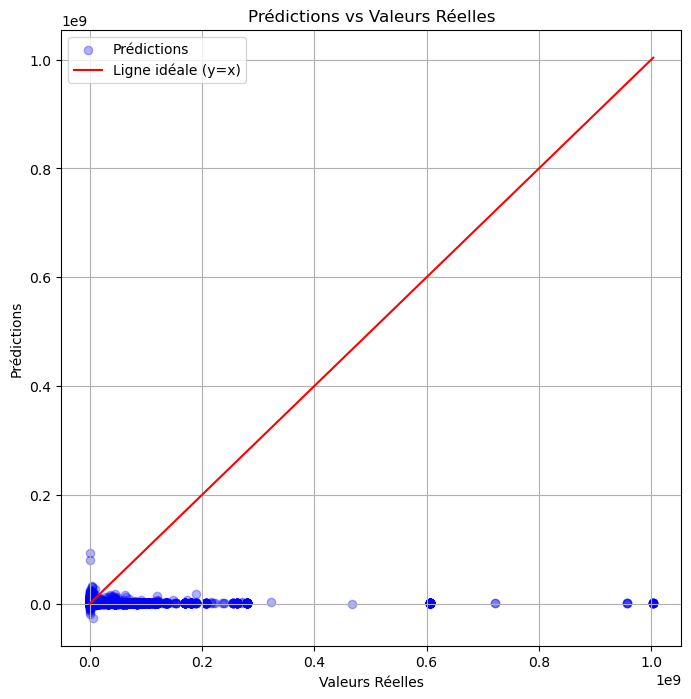

In [34]:
# Créer un graphique pour visualiser les prédictions vs les valeurs réelles
plt.figure(figsize=(8, 8))
plt.scatter(y_train_final, y_pred, alpha=0.3, label="Prédictions", color='blue')
plt.plot([min(y_train_final), max(y_train_final)], [min(y_train_final), max(y_train_final)], 
         color="red", label="Ligne idéale (y=x)")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs Réelles")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
pip install xgboost


     -------------------------------------- 124.9/124.9 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
# Créer et entraîner un modèle XGBoost
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train_final, y_train_final)

# Prédictions avec XGBoost
y_pred_xgb = xgb_model.predict(X_test_final)

# Évaluation du modèle XGBoost avec RMSE
rmse_xgb = mean_squared_error(y_test_final, y_pred_xgb, squared=False)
print(f"RMSE avec XGBoost: {rmse_xgb}")

RMSE avec XGBoost: 5435926.695802487


In [35]:
# Vérifions les dimensions des deux séries
print(f"Dimension de y_test_final : {len(y_test_final)}")
print(f"Dimension de y_pred : {len(y_pred)}")


Dimension de y_test_final : 608622
Dimension de y_pred : 2434486


In [37]:
# Vérifions la taille de X_test_final
print(f"Dimension de X_test_final : {len(X_test_final)}")

Dimension de X_test_final : 608622


In [40]:
# Assurons-nous que le processus de création des ensembles est cohérent

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_train_final, y_train_final, test_size=0.2, random_state=42
)

In [42]:
# Reprenons la prédiction
y_pred = model.predict(X_test_final)


In [43]:
# verifions à nouveau les dimensions 
print(f"Dimension recalculée de y_pred : {len(y_pred)}")


Dimension recalculée de y_pred : 486898


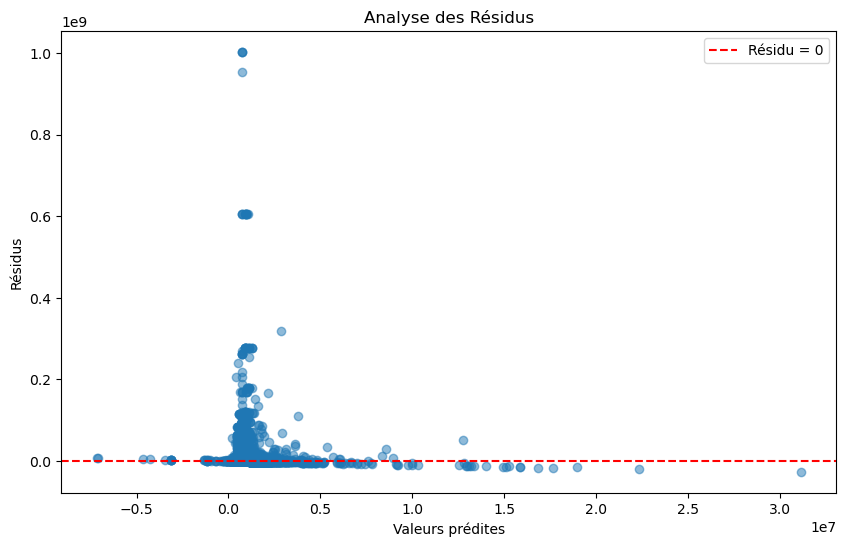

In [44]:
# Visualisons les résidus
import matplotlib.pyplot as plt
residuals = y_test_final - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', label='Résidu = 0')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Analyse des Résidus")
plt.legend()
plt.show()